<a href="https://www.kaggle.com/code/cristianojoseblanco/diabetes?scriptVersionId=169510342" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/Training.csv
/kaggle/input/diabetes-dataset/Testing.csv


In [2]:
# Importing other libraries
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Loading and Cleaning Data

In [4]:
# load data
df_train = pd.read_csv("/kaggle/input/diabetes-dataset/Training.csv")
df_test = pd.read_csv("/kaggle/input/diabetes-dataset/Testing.csv")
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [6]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Values 0 for columns (Insulin for example)
df_train[df_train.Insulin == 0].value_counts

<bound method DataFrame.value_counts of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
5               5      116             74              0        0  25.6   
7              10      115              0              0        0  35.3   
...           ...      ...            ...            ...      ...   ...   
2446            1       97             70             15        0  18.2   
2451            5      116             74              0        0  25.6   
2453            8      125             96              0        0   0.0   
2454            2       99              0              0        0  22.2   
2456            4      123             62              0        0  32.0   

      DiabetesPedigreeFunction  Age  Outcome  
0           

In [8]:
# For BloodPressure, SkinThickness, Glucose, Insulin, BMI 
# substitute values 0 by the total column mean as 0 may not be a real data for these variables.
for i in ['BloodPressure', 'SkinThickness', 'Glucose', 'Insulin', 'BMI']:
    df_train[i] = df_train[i].replace([0], df_train[i].mean())

In [9]:
# Values 0 for columns (Insulin for example)
df_train[df_train.Insulin == 0].value_counts

<bound method DataFrame.value_counts of Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []>

In [10]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,122.442372,72.108664,26.515424,118.583993,32.393579,0.491440,32.821951,0.390244
std,3.296458,30.126778,11.565730,9.396004,95.242717,6.914903,0.363917,11.251208,0.487904
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,101.000000,64.000000,20.531301,80.119919,27.400000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,80.119919,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Histograms

In [11]:
pio.templates.default = "plotly_dark"

In [12]:
# For each histogram, red and blue will represent 0 and 1 for Outcome respectively.

for i in df_train.columns:
    fig = px.histogram(df_train,
                    x=i,
                    marginal='box',
                    color = 'Outcome',
                    color_discrete_sequence = ['#800000', '#b2b2ff'],
                    title='{} x Diabetes'.format(i)
                    )
    fig.update_layout(bargap=0.1)
    fig.show()

In [13]:
# Glucuse and BMI may have huge impact on our target (Outcome)

In [14]:
# Now we will decide the variables for our model
input_cols = ['Glucose', 'BMI']
target_col = 'Outcome'

In [15]:
df_train[input_cols].isna().sum()

Glucose    0
BMI        0
dtype: int64

### Data preprocessing for our model


In [16]:
scaler = MinMaxScaler()
scaler.fit(df_train[input_cols])

MinMaxScaler()

In [17]:
df_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.8,0.733,48,0
1,1,71,62,0,0,21.8,0.416,26,0
2,8,74,70,40,49,35.3,0.705,39,0
3,5,88,78,30,0,27.6,0.258,37,0
4,10,115,98,0,0,24.0,1.022,34,0


In [18]:
# Tranforming the range of values for our variables to (0,1)
df_train[input_cols] = scaler.transform(df_train[input_cols])
df_test[input_cols] = scaler.transform(df_test[input_cols])

In [19]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.679739,72.0,35.000000,80.119919,0.314928,0.627,50,1
1,1,0.267974,66.0,29.000000,80.119919,0.171779,0.351,31,0
2,8,0.908497,64.0,20.531301,80.119919,0.104294,0.672,32,1
3,1,0.294118,66.0,23.000000,94.000000,0.202454,0.167,21,0
4,0,0.607843,40.0,35.000000,168.000000,0.509202,2.288,33,1


In [20]:
df_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,0.496732,72,22,56,0.053170,0.733,48,0
1,1,0.176471,62,0,0,0.073620,0.416,26,0
2,8,0.196078,70,40,49,0.349693,0.705,39,0
3,5,0.287582,78,30,0,0.192229,0.258,37,0
4,10,0.464052,98,0,0,0.118609,1.022,34,0


In [21]:
train_inputs = df_train[input_cols].copy()
train_targets = df_train[target_col].copy()
test_inputs = df_test[input_cols].copy()
test_targets = df_test[target_col].copy()

### Training Logistic Regression Model

In [22]:
model = LogisticRegression(solver='liblinear')

In [23]:
model.fit(train_inputs[input_cols], train_targets)

LogisticRegression(solver='liblinear')

In [24]:
print(input_cols)
print(model.coef_.tolist())
print(model.intercept_)

['Glucose', 'BMI']
[[4.701388986467512, 3.665499288174239]]
[-4.00494596]


### Making Predictions and Evaluating the Model

In [25]:
X_train = train_inputs[input_cols]
X_test = test_inputs[input_cols]

In [26]:
train_preds = model.predict(X_train)

In [27]:
# Create a function to predict and show the results
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 73.01%


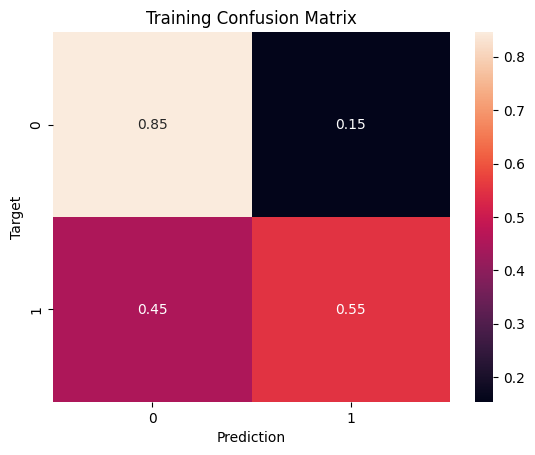

In [28]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 79.55%


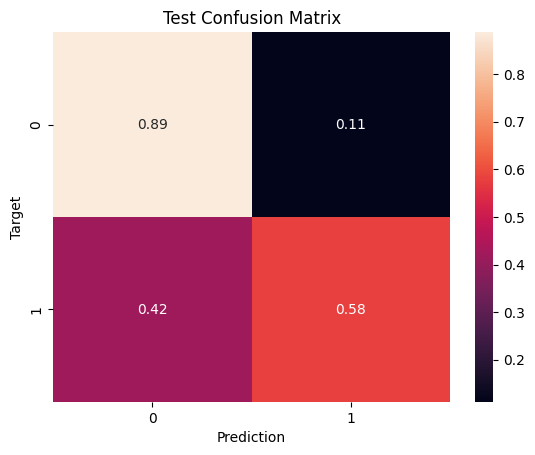

In [29]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')


In [30]:
# Our model got an accuracy of 79.55%